# **Data Visualization Notebook**

## Objectives

- Address business requiremenent 1:
    - The client is interested in conducting a study to visually differentiate a cherry leaf that is healthy from one that contains powdery mildew.

## Inputs

This notebook will use the following inputs:
- inputs\cherry-leaves\cherry-leaves\test
- inputs\cherry-leaves\cherry-leaves\train
- inputs\cherry-leaves\cherry-leaves\validation

## Outputs

This notebook will generate the following outputs:
- A pickle file storing image shape embeddings (image data stored as a numercal representation) 
- Plots that show the mean (average) image and variability of images for each label
- A plot to show the difference beween healthy leaves and mildewed leaves
- Code to address business requirement 1 and build an image montage

## Set the Data Visualisazation Directories

### Import the required libraries

In [75]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

### Set the working directory

Identify the current working directory

In [76]:
current_dir = os.getcwd()  
print(f"📂 Current Directory: {current_dir}")


📂 Current Directory: /workspaces/milestone-project-mildew-detection-in-cherry-leaves


Set a new working directory

In [77]:
target_dir = "/workspaces/milestone-project-mildew-detection-in-cherry-leaves"  # Replace with your correct path
os.chdir(target_dir)
print(f"✅ Working Directory Set to: {os.getcwd()}")

✅ Working Directory Set to: /workspaces/milestone-project-mildew-detection-in-cherry-leaves


Check the new working directory

In [78]:
current_dir = os.getcwd()
print(f"📂 Current Directory: {current_dir}")

📂 Current Directory: /workspaces/milestone-project-mildew-detection-in-cherry-leaves


### Set the input directories

Establish the train, test and validation directory paths

In [79]:

image_data = "inputs/cherry-leaves/cherry-leaves"
train_path = os.path.join(image_data, "train")
val_path = os.path.join(image_data, "validation")
test_path = os.path.join(image_data, "test")

print(f"📂 Train Path: {train_path}")
print(f"📂 Validation Path: {val_path}")
print(f"📂 Test Path: {test_path}")

📂 Train Path: inputs/cherry-leaves/cherry-leaves/train
📂 Validation Path: inputs/cherry-leaves/cherry-leaves/validation
📂 Test Path: inputs/cherry-leaves/cherry-leaves/test


### Confrim that the file paths look good

Select and display one random image from each train, test and validation folder to confirm that the file paths are correct.

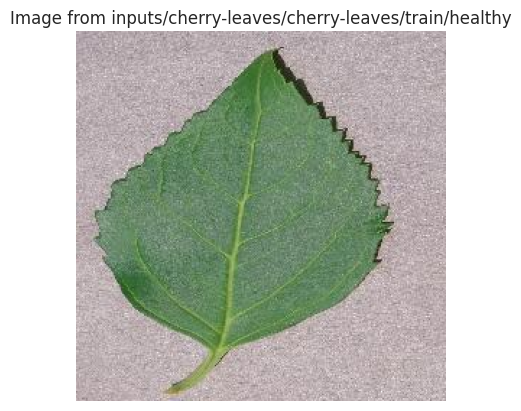

✅ Random train image: inputs/cherry-leaves/cherry-leaves/train/healthy/229c7cc9-9dd9-4db0-af74-f8499d206abf___JR_HL 9489.JPG


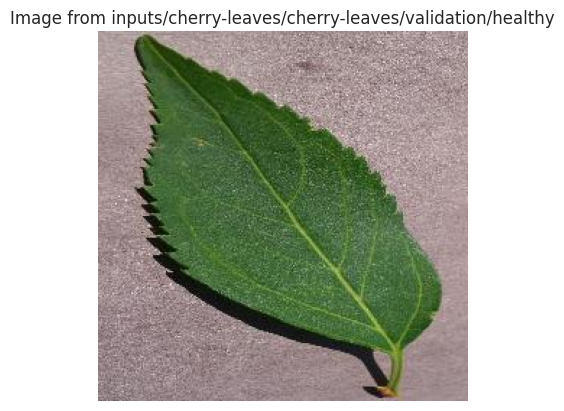

✅ Random validation image: inputs/cherry-leaves/cherry-leaves/validation/healthy/88aa10b3-3574-49a1-8bb3-183525fa9848___JR_HL 4081.JPG


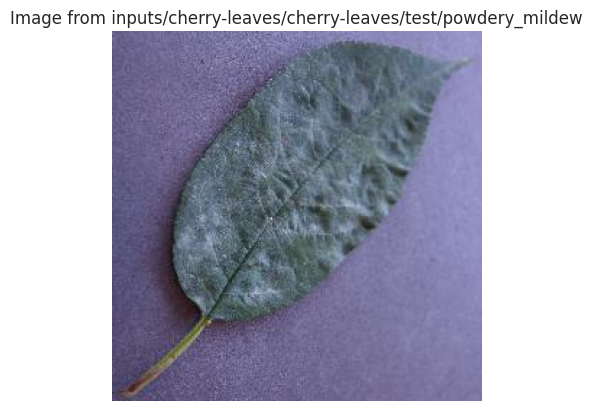

✅ Random test image: inputs/cherry-leaves/cherry-leaves/test/powdery_mildew/2f2fdc52-8420-41d1-ab72-320a99c27537___FREC_Pwd.M 5101.JPG


In [80]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define paths correctly
image_data = "inputs/cherry-leaves/cherry-leaves"
train_path = os.path.join(image_data, "train")
val_path = os.path.join(image_data, "validation")
test_path = os.path.join(image_data, "test")

# Function to find and display a random image from subfolders
def show_random_image(parent_folder):
    """
    Selects and displays a random image from a subfolder inside the given parent directory.

    Args:
        parent_folder (str): The path to the main dataset folder (e.g., train, validation, test).

    Returns:
        str or None: The full path to the randomly selected image, or None if no images are found.
    """

    # Ensure the parent folder exists
    if not os.path.exists(parent_folder):
        print(f"❌ Path does not exist: {parent_folder}")
        return None

    # Scan subdirectories ("healthy", "powdery_mildew")
    subfolders = [os.path.join(parent_folder, subdir) for subdir in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, subdir))]

    if not subfolders:
        print(f"⚠️ No subfolders found in: {parent_folder}")
        return None

    # Pick a random subfolder
    chosen_folder = random.choice(subfolders)

    # Find image files inside that subfolder
    images = [f for f in os.listdir(chosen_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.webp'))]

    if not images:
        print(f"⚠️ No images found in: {chosen_folder}")
        return None

    # Select a random image and display it
    image_path = os.path.join(chosen_folder, random.choice(images))
    image = Image.open(image_path)

    plt.imshow(image)
    plt.title(f"Image from {chosen_folder}")
    plt.axis("off")  # Hide axes for a cleaner look
    plt.show()

    return image_path  # Return path for confirmation

# Fetch and display random images from each dataset section
train_image = show_random_image(train_path)
print(f"✅ Random train image: {train_image}")
val_image = show_random_image(val_path)
print(f"✅ Random validation image: {val_image}")
test_image = show_random_image(test_path)
print(f"✅ Random test image: {test_image}")





Set the ouptut directory

In [81]:
# Define the version of the output directory
version = 'v1'
current_dir = os.getcwd()  # Get the current working directory

# Construct the full path for the versioned output folder
file_path = os.path.join(current_dir, 'outputs', version)

# Check if the directory for this version already exists
if os.path.exists(file_path):
    print(f'⚠️ Old version "{version}" already exists. Create a new version.')
else:
    try:
        # Create the directory if it doesn't exist, `exist_ok=True` prevents errors if it already exists
        os.makedirs(file_path, exist_ok=True)
        print(f'✅ Created new directory: {file_path}')
    except OSError as e:
        # Print an error message if directory creation fails
        print(f'❌ Error creating directory: {e}')

✅ Created new directory: /workspaces/milestone-project-mildew-detection-in-cherry-leaves/outputs/v1


### Set the label names

Labels should be 'healthy' and 'powdery_mildew'.

In [84]:
# Set the labels
labels = os.listdir(train_path)
print('🏷️ The labels for the images are', labels)

🏷️ The labels for the images are ['healthy', 'powdery_mildew']
